#### Probability Rules

1. **Addition Rule:**
    - **Formula for Mutually Exclusive Events:**
    $[ P(A \cup B) = P(A) + P(B) ]$
    - **Formula for A and B are Not Mutually Exclusive Events:**
    $[ P(A \cup B) = P(A) + P(B) - P(A \cap B) ]$

**Summary:** The Addition Rule calculates the probability of the union of events and depends on whether the events are mutually exclusive.

$ [ P(\text{Event}) = \frac{\text{Number of ways it can happen}}{\text{Total number of outcomes}} ] $

In [83]:
import numpy as np
import matplotlib.pyplot as plt


def simulate_fair_die(rolls):
    # Simulate rolling a fair six-sided die 'rolls' times
    outcomes = np.random.randint(1, 7, rolls)
    return outcomes

Probability (1): 0.1672
Probability (2): 0.1668
Probability (3): 0.1666
Probability (4): 0.1667
Probability (5): 0.1666
Probability (6): 0.1660


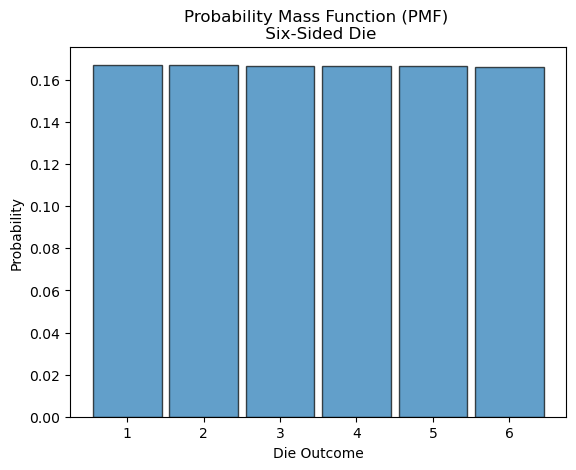

In [84]:
rolls = 1_000_000
die_outcomes = simulate_fair_die(rolls)

# Calculate probabilities for each outcome
# for outcome in range(1, 7):
#     prob = np.mean(die_outcomes == outcome)
#     print(f"P({outcome}): {prob:.4f}")


unique_outcomes, counts = np.unique(die_outcomes, return_counts=True)
for outcome, prob in zip(unique_outcomes, counts / rolls):
    print(f"Probability ({outcome}): {prob:.4f}")

# Plot the probability mass function (PMF) using histogram
plt.hist(
    x=die_outcomes,
    bins=np.arange(1, 8) - 0.5,
    density=True,
    rwidth=0.9,
    edgecolor="black",
    alpha=0.7,
)
plt.xticks(np.arange(1, 7))
plt.xlabel("Die Outcome")
plt.ylabel("Probability")
plt.title("Probability Mass Function (PMF) \n Six-Sided Die")
plt.show()

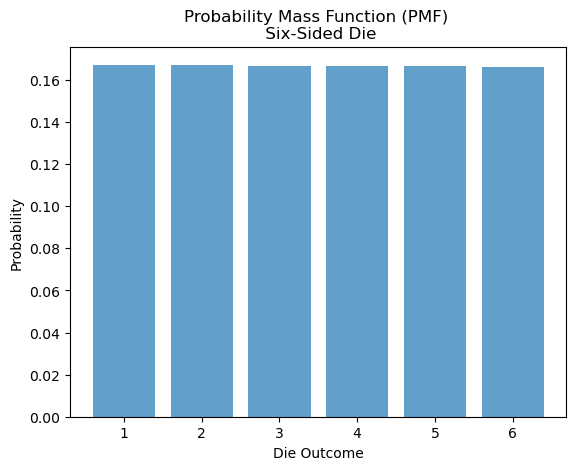

In [85]:
# Plot the probability mass function (PMF)
plt.bar(x=unique_outcomes, height=(counts / rolls), alpha=0.7)
plt.xticks(np.arange(1, 7))
plt.xlabel("Die Outcome")
plt.ylabel("Probability")
plt.title("Probability Mass Function (PMF) \n Six-Sided Die")
plt.show()

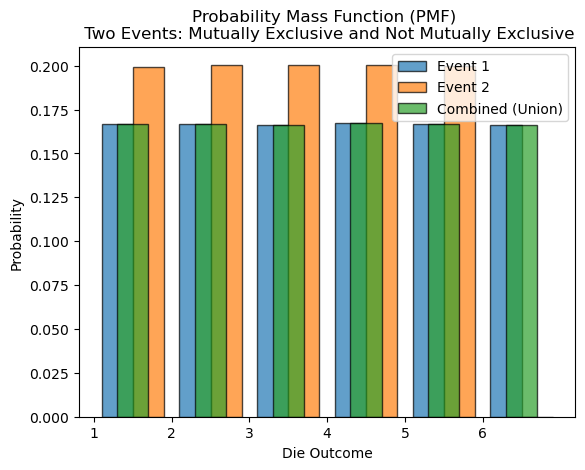

In [86]:
def simulate_fair_die(rolls):
    # Simulate rolling a fair six-sided die 'rolls' times
    outcomes = np.random.randint(1, 7, rolls)
    return outcomes


# Number of times to roll the die
rolls = 1_000_000

# Simulate fair die rolls for the first event
event1_outcomes = simulate_fair_die(rolls)

# Simulate fair die rolls for the second event
event2_outcomes = simulate_fair_die(rolls)

# Simulate fair die rolls for the combined (union) of both events
combined_outcomes = np.concatenate((event1_outcomes, event2_outcomes))

# Plot the probability mass function (PMF) for the first event using histogram
plt.hist(
    x=event1_outcomes,
    bins=np.arange(1, 8) - 0.2,
    density=True,
    rwidth=0.4,
    edgecolor="black",
    alpha=0.7,
    label="Event 1",
)

# Plot the probability mass function (PMF) for the second event using histogram
plt.hist(
    x=event2_outcomes,
    bins=np.arange(1, 8) + 0.2,
    density=True,
    rwidth=0.4,
    edgecolor="black",
    alpha=0.7,
    label="Event 2",
)

# Plot the probability mass function (PMF) for the combined events using histogram
plt.hist(
    x=combined_outcomes,
    bins=np.arange(1, 8),
    density=True,
    rwidth=0.4,
    edgecolor="black",
    alpha=0.7,
    label="Combined (Union)",
)

plt.xticks(np.arange(1, 7))
plt.xlabel("Die Outcome")
plt.ylabel("Probability")
plt.title(
    "Probability Mass Function (PMF) \n Two Events: Mutually Exclusive and Not Mutually Exclusive"
)
plt.legend()
plt.show()

In [87]:
def simulate_fair_die(rolls):
    # Simulate rolling a fair six-sided die 'rolls' times
    outcomes = np.random.randint(1, 7, rolls)
    return outcomes


sample_space = simulate_fair_die(100000)


event_A = sample_space == 1  # Outcome is 1
event_B = sample_space == 2  # Outcome is 2

prob_A = np.sum(event_A) / len(sample_space)
prob_B = np.sum(event_B) / len(sample_space)

A_union_B = np.logical_or(event_A, event_B)  # equivalent to (A ∪ B)
prob_A_union_B = np.sum(A_union_B) / len(sample_space)

A_intersect_B = np.logical_and(event_A, event_B)
prob_A_intersect_B = np.sum(A_intersect_B) / len(sample_space)

not_mutually_exclusive = prob_A_intersect_B > 0


lhs = prob_A_union_B
rhs = prob_A + prob_B - prob_A_intersect_B  # P( A ∪ B )=P(A)+P(B)−P(A∩B)

print(f"P(A): {prob_A:.4f}")
print(f"P(B): {prob_B:.4f}")
print(f"P(A ∪ B): {prob_A_union_B:.4f}")
print(f"P(A ∩ B): {prob_A_intersect_B:.4f}")
print(f"P(A ∪ B) == P(A) + P(B) - P(A ∩ B): {lhs == rhs}")
print(
    f"P(A ∩ B): {prob_A_intersect_B:.4f}"
    if not_mutually_exclusive
    else "Events A and B are mutually exclusive."
)

P(A): 0.1648
P(B): 0.1658
P(A ∪ B): 0.3306
P(A ∩ B): 0.0000
P(A ∪ B) == P(A) + P(B) - P(A ∩ B): True
Events A and B are mutually exclusive.


In [88]:
sample_space = simulate_fair_die(100000)

# Define events A and B
event_A = sample_space == 1  # Outcome is 1
event_B = sample_space == 2  # Outcome is 2

# Calculate probabilities for events A, B, A union B, and A intersection B
prob_A = np.sum(event_A) / len(sample_space)
prob_B = np.sum(event_B) / len(sample_space)
prob_A_union_B = np.sum(np.logical_or(event_A, event_B)) / len(sample_space)
prob_A_intersect_B = np.sum(np.logical_and(event_A, event_B)) / len(sample_space)

# Apply the not mutually exclusive formula
lhs_not_mutually_exclusive = prob_A_union_B
rhs_not_mutually_exclusive = prob_A + prob_B - prob_A_intersect_B

print("Probabilities for Not Mutually Exclusive Events:")
print(f"P(A): {prob_A:.4f}")
print(f"P(B): {prob_B:.4f}")
print(f"P(A ∪ B): {prob_A_union_B:.4f}")
print(f"P(A ∩ B): {prob_A_intersect_B:.4f}")
print(
    f"P(A ∪ B) == P(A) + P(B) - P(A ∩ B): {lhs_not_mutually_exclusive == rhs_not_mutually_exclusive}"
)
print(
    f"P(A ∩ B): {prob_A_intersect_B:.4f}"
    if prob_A_intersect_B > 0
    else "Events A and B are mutually exclusive."
)

Probabilities for Not Mutually Exclusive Events:
P(A): 0.1652
P(B): 0.1661
P(A ∪ B): 0.3313
P(A ∩ B): 0.0000
P(A ∪ B) == P(A) + P(B) - P(A ∩ B): True
Events A and B are mutually exclusive.
